In [1]:
#https://qiita.com/koichi_hiphopdream/items/f01d195cdc34acb5f879
#ワインの等級を分類

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
#df = pd.read_csv('wine.csv')

In [8]:
print(df)
#0:Class, 1:Alcohol, 2:Malic_acid, 3:Ash, 4:Alcalinity_of_ash, 5:Magnesium, 6:Total_phenols, 7:Flavanoids, 8:Nonflavanoid_phenols, 9:Proanthocyanins, 10:Color_intensity, 11:Hue, 12:OD280/OD315_of_diluted_wines, 13:Proline

     0      1     2     3     4    5     6     7     8     9          10  \
0     1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29   5.640000   
1     1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28   4.380000   
2     1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81   5.680000   
3     1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18   7.800000   
4     1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82   4.320000   
5     1  14.20  1.76  2.45  15.2  112  3.27  3.39  0.34  1.97   6.750000   
6     1  14.39  1.87  2.45  14.6   96  2.50  2.52  0.30  1.98   5.250000   
7     1  14.06  2.15  2.61  17.6  121  2.60  2.51  0.31  1.25   5.050000   
8     1  14.83  1.64  2.17  14.0   97  2.80  2.98  0.29  1.98   5.200000   
9     1  13.86  1.35  2.27  16.0   98  2.98  3.15  0.22  1.85   7.220000   
10    1  14.10  2.16  2.30  18.0  105  2.95  3.32  0.22  2.38   5.750000   
11    1  14.12  1.48  2.32  16.8   95  2.20  2.43  0.26  1.57   5.000000   
12    1  13.

In [9]:
# 分類するクラスの種類と数を確認
df[0].value_counts()

2    71
1    59
3    48
Name: 0, dtype: int64

In [10]:
# 機械学習のモデルを作成するトレーニング用と評価用の2種類に分割する
train_x = df.drop([0], axis=1) # 説明変数のみにする
train_y = df[0] # 正解クラス
(train_x, test_x ,train_y, test_y) = train_test_split(train_x, train_y, test_size = 0.3, random_state = 42)
#訓練用の説明変数と正解クラス、評価用の説明変数と正解クラスに分割

In [11]:
# 識別モデルの構築
random_forest = RandomForestClassifier(max_depth=30, n_estimators=30, random_state=42)
random_forest.fit(train_x, train_y)

# 予測値算出
y_pred = random_forest.predict(test_x)

#モデルを作成する段階でのモデルの識別精度
trainaccuracy_random_forest = random_forest.score(train_x, train_y)
print('TrainAccuracy: {}'.format(trainaccuracy_random_forest))

#作成したモデルに学習に使用していない評価用のデータセットを入力し精度を確認
accuracy_random_forest = accuracy_score(test_y, y_pred)
print('Accuracy: {}'.format(accuracy_random_forest))

TrainAccuracy: 1.0
Accuracy: 0.981481481481


Text(91.68,0.5,'true value')

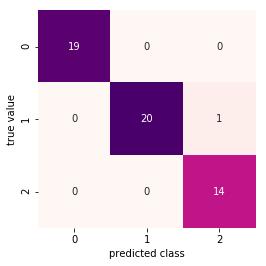

In [12]:
#confusion matrix
mat = confusion_matrix(test_y, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('predicted class')
plt.ylabel('true value')

In [13]:
# 変数の重要度を可視化
importance = pd.DataFrame({ '変数' :train_x.columns, '重要度' :random_forest.feature_importances_})
importance

,変数,重要度
0,1,0.107833
1,2,0.033442
2,3,0.009741
3,4,0.041587
4,5,0.044708
5,6,0.093477
6,7,0.182353
7,8,0.006512
8,9,0.013914
9,10,0.137475


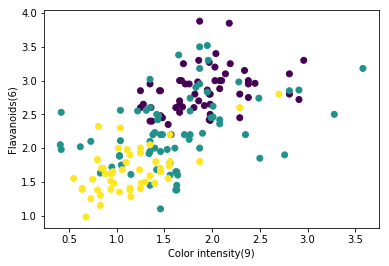

In [16]:
plt.scatter(df[9], df[6], c = df[0])
plt.ylabel('Flavanoids(6)')
plt.xlabel('Color intensity(9)')
plt.show()